In [289]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression as LinReg
import numpy as np

In [290]:
#read data into dataframe and print basic information
df = pd.read_csv("Air_Traffic_Passenger_Statistics.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              35172 non-null  int64 
 1   Activity Period Start Date   35172 non-null  object
 2   Operating Airline            35172 non-null  object
 3   Operating Airline IATA Code  34856 non-null  object
 4   Published Airline            35172 non-null  object
 5   Published Airline IATA Code  34856 non-null  object
 6   GEO Summary                  35172 non-null  object
 7   GEO Region                   35172 non-null  object
 8   Activity Type Code           35172 non-null  object
 9   Price Category Code          35172 non-null  object
 10  Terminal                     35172 non-null  object
 11  Boarding Area                35172 non-null  object
 12  Passenger Count              35172 non-null  int64 
 13  data_as_of                   35

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2023/12/21 12:05:27 AM,2024/01/20 07:02:35 AM


In [291]:
#remove nulls and convert data types
print(df.isna().sum())
df.dropna(inplace=True)
df = df.convert_dtypes()

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    316
Published Airline                0
Published Airline IATA Code    316
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Price Category Code              0
Terminal                         0
Boarding Area                    0
Passenger Count                  0
data_as_of                       0
data_loaded_at                   0
dtype: int64


In [292]:
#convert datetime types
df['Activity Period'] = pd.to_datetime(df['Activity Period'], format="%Y%m")
df['Activity Period Start Date'] = pd.to_datetime(df['Activity Period Start Date'], format="%Y/%m/%d")
df['data_as_of'] = pd.to_datetime(df['data_as_of'], format="%Y/%m/%d %I:%M:%S %p")
df['data_loaded_at'] = pd.to_datetime(df['data_loaded_at'], format="%Y/%m/%d %I:%M:%S %p")

In [293]:
#check dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 35171
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              34856 non-null  datetime64[ns]
 1   Activity Period Start Date   34856 non-null  datetime64[ns]
 2   Operating Airline            34856 non-null  string        
 3   Operating Airline IATA Code  34856 non-null  string        
 4   Published Airline            34856 non-null  string        
 5   Published Airline IATA Code  34856 non-null  string        
 6   GEO Summary                  34856 non-null  string        
 7   GEO Region                   34856 non-null  string        
 8   Activity Type Code           34856 non-null  string        
 9   Price Category Code          34856 non-null  string        
 10  Terminal                     34856 non-null  string        
 11  Boarding Area                34856 non-null  s

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,1999-07-01,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2023-12-21 00:05:27,2024-01-20 07:02:35
1,1999-07-01,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2023-12-21 00:05:27,2024-01-20 07:02:35
2,1999-07-01,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2023-12-21 00:05:27,2024-01-20 07:02:35
5,1999-07-01,1999-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,24124,2023-12-21 00:05:27,2024-01-20 07:02:35
6,1999-07-01,1999-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,23613,2023-12-21 00:05:27,2024-01-20 07:02:35


Text(0, 0.5, 'passenger count (hundreds of millions)')

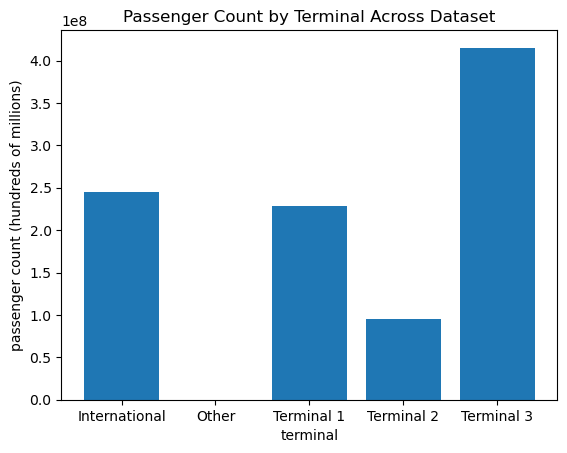

In [295]:
#get sums of passenger count by terminal
pass_traf_by_term = df.groupby(['Terminal'])['Passenger Count'].sum()

#plot
plt.bar(pass_traf_by_term.index, pass_traf_by_term.values)
plt.title("Passenger Count by Terminal Across Dataset")
plt.xlabel("terminal")
plt.ylabel("passenger count (hundreds of millions)")

Terminal 3 had by far the most passengar traffic, with about 400 million total passengers. Terminal 1 and the International terminal around the same amount of traffic with about 250 million passengers each, and Terminal 2 with a lesser 100 million passengers. Other terminals had less than 10 million total passengers and did not register on the graph.

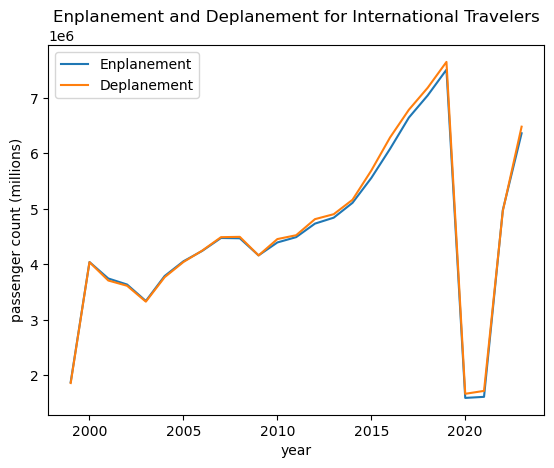

In [298]:
#get sums of passenger count for international enplanement and deplanement by year
int_enpl_by_year = df.loc[(df['Activity Type Code'] == 'Enplaned') & (df['GEO Summary'] == 'International')].groupby(
    df['Activity Period'].dt.year)['Passenger Count'].sum()
int_depl_by_year = df.loc[(df['Activity Type Code'] == 'Deplaned') & (df['GEO Summary'] == 'International')].groupby(
    df['Activity Period'].dt.year)['Passenger Count'].sum()

#plot enplanement and deplanement
plt.plot(int_enpl_by_year, label="Enplanement")
plt.plot(int_depl_by_year, label="Deplanement")
plt.title("Enplanement and Deplanement for International Travelers")
plt.xlabel("year")
plt.ylabel("passenger count (millions)")
plt.legend()

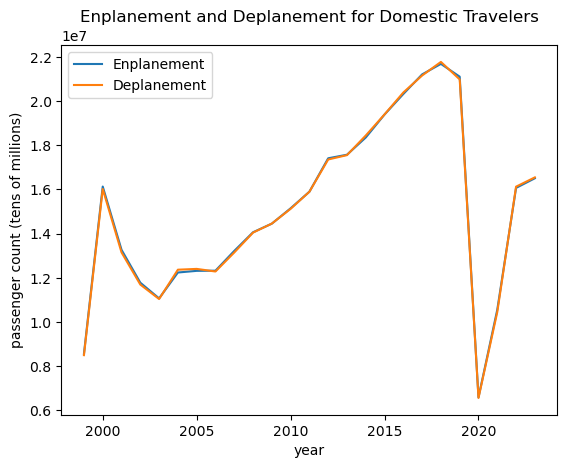

In [299]:
#get sum of passenger count for domestic enplanement and deplanement by year
dom_enpl_by_year = df.loc[(df['Activity Type Code'] == 'Enplaned') & (df['GEO Summary'] == 'Domestic')].groupby(
    df['Activity Period'].dt.year)['Passenger Count'].sum()
dom_depl_by_year = df.loc[(df['Activity Type Code'] == 'Deplaned') & (df['GEO Summary'] == 'Domestic')].groupby(
    df['Activity Period'].dt.year)['Passenger Count'].sum()

#plot enplanement and deplanement
plt.plot(dom_enpl_by_year, label="Enplanement")
plt.plot(dom_depl_by_year, label="Deplanement")
plt.title("Enplanement and Deplanement for Domestic Travelers")
plt.xlabel("year")
plt.ylabel("passenger count (tens of millions)")
plt.legend()

For domestic and international travel, deplanement closeley matched enplanement, though the match was slightly closer for domestic travel. Both graphs displayed an increase at the start of the data range, followed by a dip post-2001 (presumably due to 9/11), and a steady increase until 2020, followed by a large dip and moderate rebound over the next few years (presumably due to Covid-19). The first dip was a lot more drastic for domestic travel, which makes sense given its likely cause. The graph for domestic travellers deals on the order of tens of millions, whereas the international graph is on the order of millions.

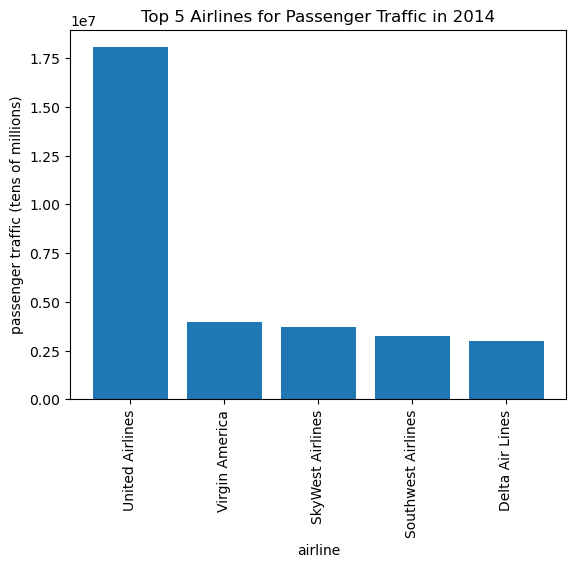

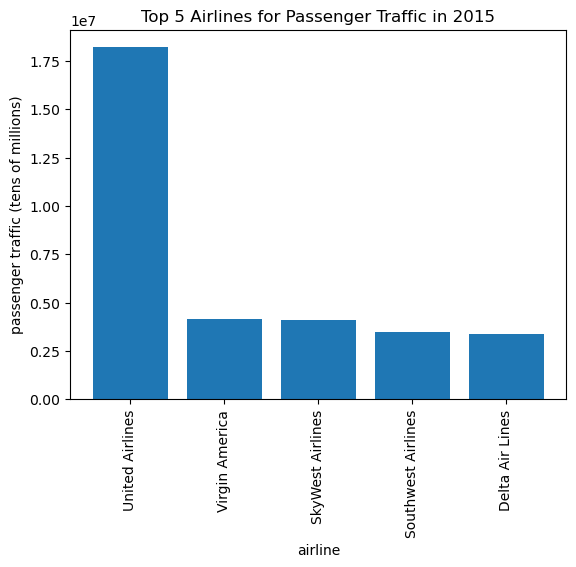

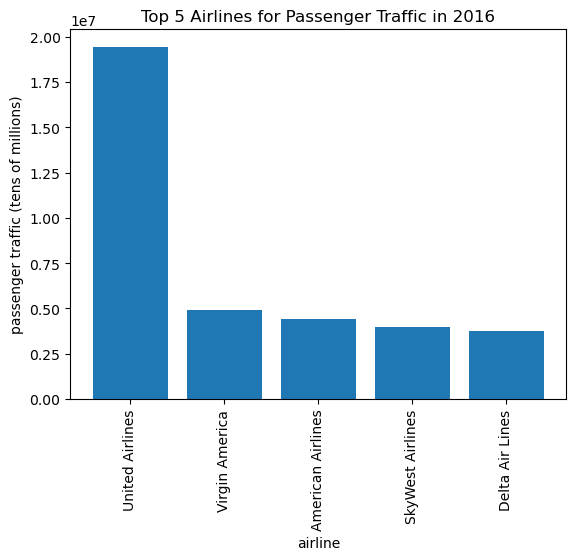

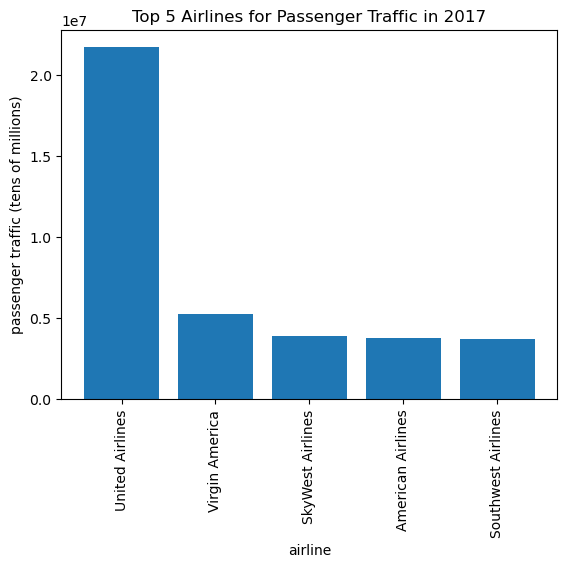

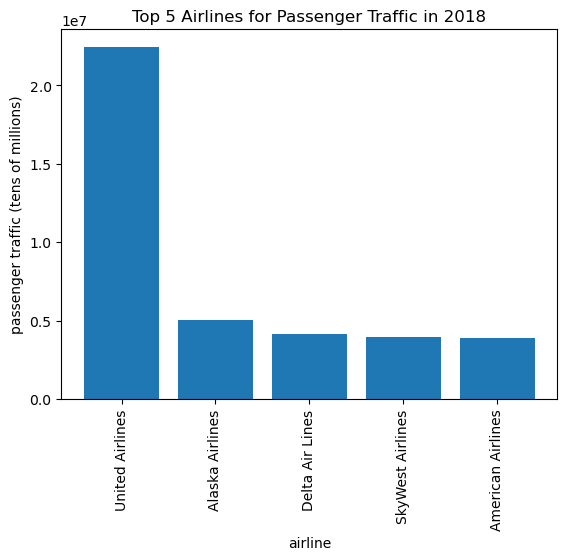

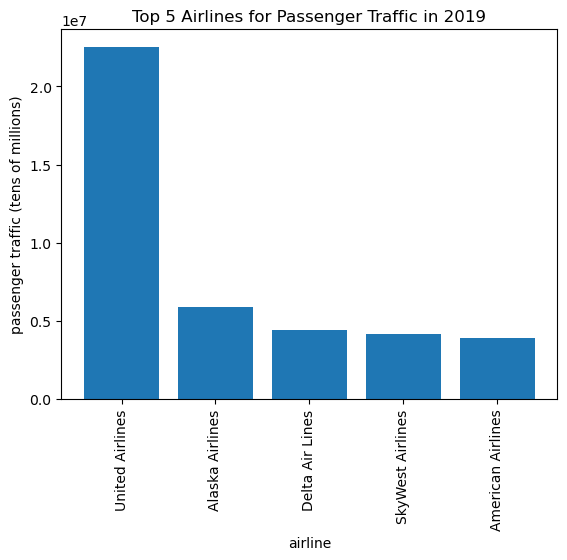

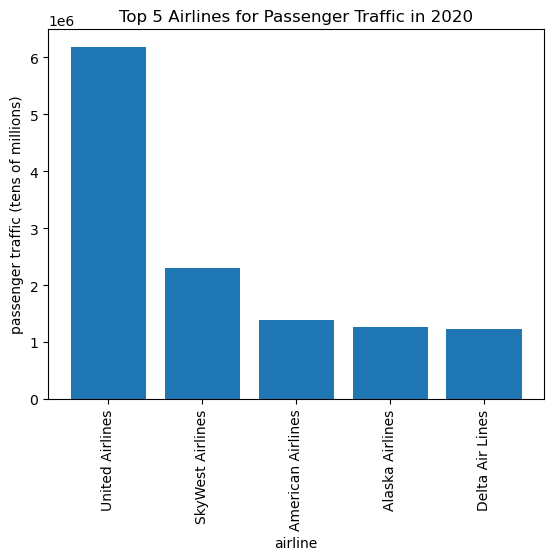

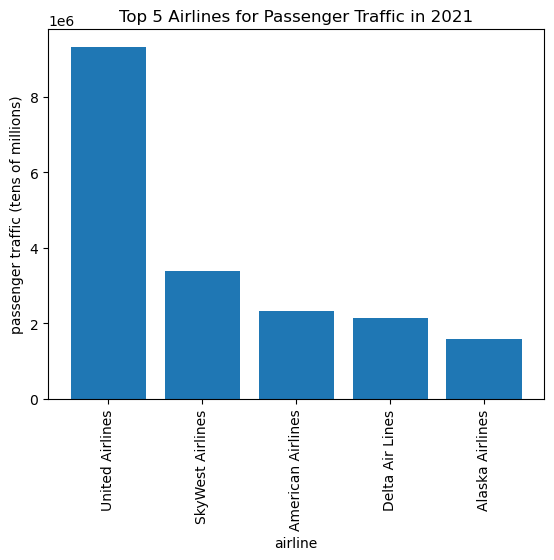

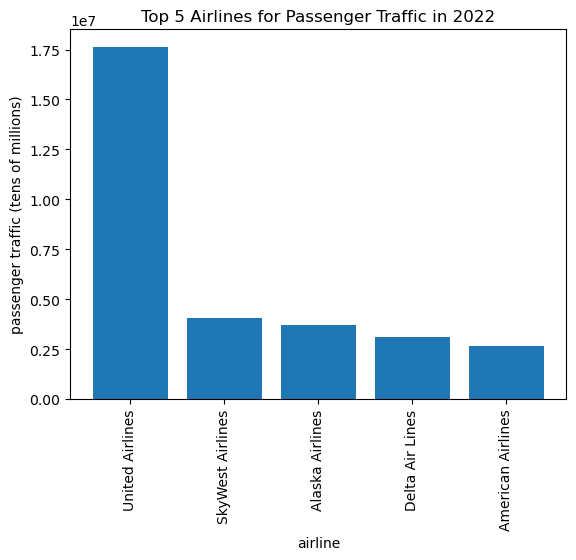

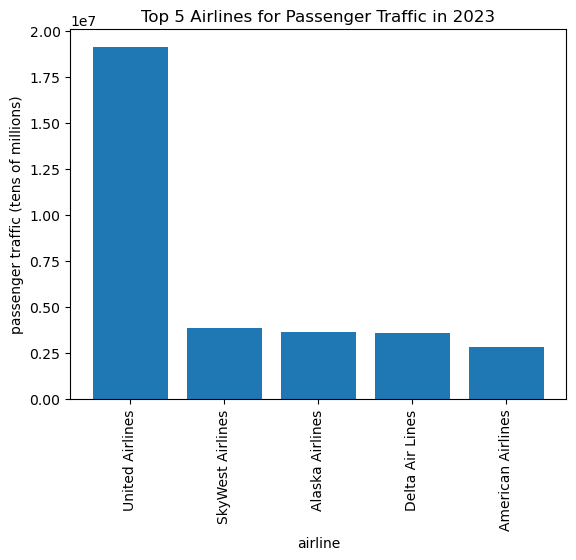

In [302]:
#get sum of passenger count per airline by year, and filter for data 2013 and later
arlns_by_year = df.groupby([df['Activity Period'].dt.year, 'Operating Airline'])['Passenger Count'].sum()
arlns_by_year = arlns_by_year[arlns_by_year.index.get_level_values('Activity Period') > 2013]

#iterate over years
for year, ser in arlns_by_year.groupby(level=0):
    #get top 5 airlines per year in terms of passenger traffic
    ser = ser.sort_values(ascending=False).head()

    #plot
    plt.bar(ser.droplevel(0).index, ser.droplevel(0).values)
    plt.title(("Top 5 Airlines for Passenger Traffic in " + str(year)))
    plt.xlabel("airline")
    plt.ylabel("passenger traffic (tens of millions)")
    plt.xticks(rotation=90)
    plt.show()

Across the 10 year span, United Airlines consistently has the highest passenger traffic, accounting for about half of all traffic yearly. The runner ups were among Virgin America, SkyWest Airlines, Southwest Airlines, and Delta Airlines up until 2018, with Alaska Airlines replacing Virgin Airlines in the top 5 from 2018 onward. Aside from United Airlines, the top 5 airlines rotate amongs each other year to year and all accounted for about the same amount of passenger traffic.

Text(0, 0.5, 'passenger count (millions)')

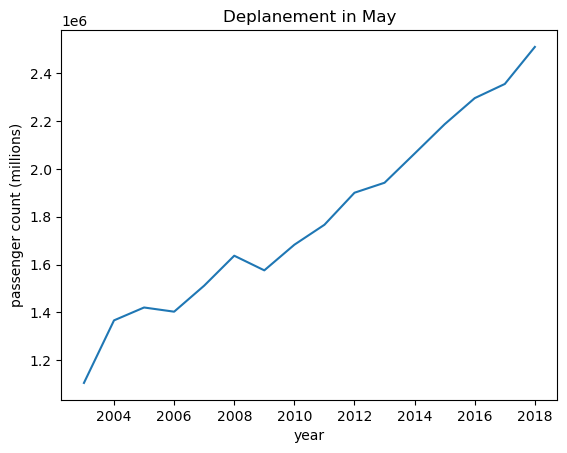

In [305]:
#get sum of passenger counts for May deplanements by year, and filter for data from 2003 to 2018
may_depl_by_year = df.loc[(df['Activity Period'].dt.month == 5) & (df['Activity Type Code'] == 'Deplaned')].groupby(
    df['Activity Period'].dt.year)['Passenger Count'].sum()
may_depl_by_year = may_depl_by_year[(may_depl_by_year.index > 2002) & (may_depl_by_year.index < 2019)]

#plot
plt.plot(may_depl_by_year)
plt.title("Deplanement in May")
plt.xlabel("year")
plt.ylabel("passenger count (millions)")

May deplanements show a steady increase over the course of the data range, starting at about 1 million passenger and ending at around 2.5 million. There was a minor plateau from 2004-2006, and a small spike in 2008, but otherwise, the data follows a very predictable and mostly linear path.

In [308]:
#format X and y to train model
X = may_depl_by_year.index.to_numpy().reshape(-1, 1)
y = may_depl_by_year.values.to_numpy().reshape(-1, 1)

#initialize and fit model
model = LinReg(fit_intercept=True)
model.fit(X, y)

#display regression equation
print("Linear Regression Model predicting May Deplanement based on Year")
print("y-hat =", model.intercept_[0], "+ x *", model.coef_[0, 0])

Linear Regression Model predicting May Deplanement based on Year
y-hat = -166992517.9 + x * 83953.05


In [309]:
#get predictions for 2019 and 2020
preds = (model.predict(np.array([2019, 2020]).reshape(-1, 1))).round().tolist()

#get actual values for 2019 and 2020
may_depl_2yrs = df.loc[(df['Activity Period'].dt.month == 5) & (df['Activity Type Code'] == 'Deplaned')].groupby(
    df['Activity Period'].dt.year)['Passenger Count'].sum()
may_depl_2yrs = may_depl_2yrs[(may_depl_2yrs.index.isin([2019, 2020]))]

#display predicted and actual values
print("linear regression predictions for 2019 and 2020:", [int(preds[0][0]), int(preds[0][0])])
print("actual values for for 2019 and 2020:", list(may_depl_2yrs.values))

linear regression predictions for 2019 and 2020: [2508690, 2508690]
actual values for for 2019 and 2020: [2494705, 141789]


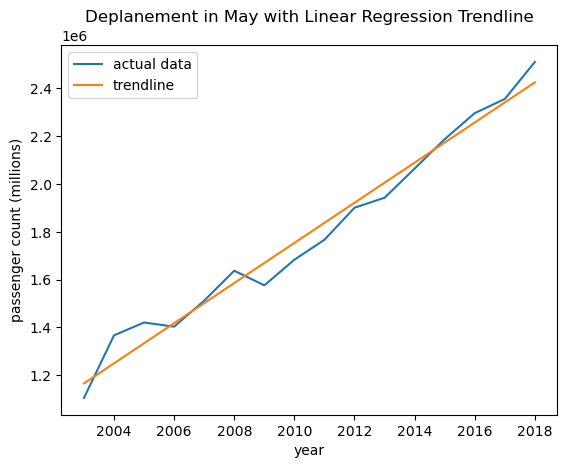

In [310]:
#get predicted values for 2003 to 2018
y_preds = list(may_depl_by_year.index * model.coef_[0, 0] + model.intercept_[0])

#plot predicted and actual values
plt.plot(may_depl_by_year, label="actual data")
plt.plot(may_depl_by_year.index, y_preds, label="trendline")
plt.title("Deplanement in May with Linear Regression Trendline")
plt.xlabel("year")
plt.ylabel("passenger count (millions)")
plt.legend()

The model predicts the 2019 deplanement value very well, and is off by less than 25 thousand for a value on the order of millions. However, the model overshoots by more than 2 million for 2020, as the actual 2020 deplanement value is a large outlier, representing a steep drop in air travel likely due to the Covid-19 pandemic. In the years trained on by the model, the predicted values match reasonably closely to the actual graph.

In [313]:
#display r^2 value for model
print("r^2 value:", model.score(X, y).round(3))

r^2 value: 0.975


Based on the r^2 value, 97.5% of the variation in passenger deplanement can be explained through a linear relationship with the year, meaning that the linear regression model used fits the data very well.

Text(0, 0.5, 'residual')

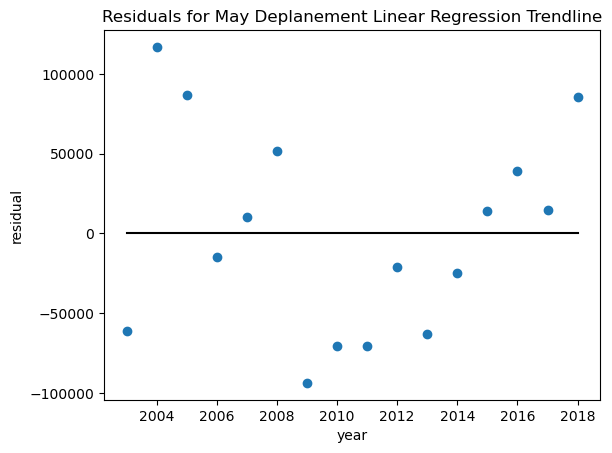

In [316]:
#get residual values
resid_y = may_depl_by_year.values - y_preds

#create x-axis line
y_0 = [0]*16

#plot
plt.scatter(may_depl_by_year.index, resid_y)
plt.plot(may_depl_by_year.index, y_0, color="black")
plt.title("Residuals for May Deplanement Linear Regression Trendline")
plt.xlabel("year")
plt.ylabel("residual")

The residuals are all somewhat evenly distributed, indicating that the linear model generated is an unbiased estimator of deplanement. The residuals are on the order of tens of thousands while the actual values were on the order of millions, so the model not only matches the trend very well, but lies close to the values themselves. The model tended to overshoot values at the start and end of the dataset, and undershot in the middle, but likley not in a statistically significant way.